# Fashion MNIST


## Importing the libraries and the dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'
}

## Visualizing the Data

The dimensions of the dataset are (60000, 28, 28)
The dimensions of the given image are (28, 28)
The name of the apparel in the given image is Ankle boot


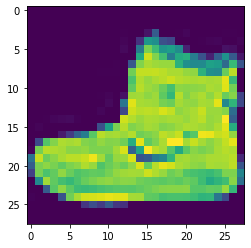

In [2]:
print('The dimensions of the dataset are ' + str(x_train.shape))
print("The dimensions of the given image are " + str(x_train[0].shape))
plt.imshow(x_train[0])
print("The name of the apparel in the given image is " + label_dict[y_train[0]])

## Preprocessing the Data

In [3]:
# converting the output to categorical labels
y_cat_train=to_categorical(y_train, num_classes=10)
y_cat_test=to_categorical(y_test, num_classes=10)
print(y_cat_train.shape)
print(y_cat_test.shape)

(60000, 10)
(10000, 10)


In [4]:
# scaling the data
x_train=x_train/255
x_test=x_test/255

In [5]:
# .reshape(batch_size, width, height, color_channels)
x_train=x_train.reshape(60000, 28, 28, 1)
x_test=x_test.reshape(10000, 28, 28, 1)

## Building and Training the Model

**Consisting of at least the following layers :**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [6]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4, 4)))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

2024-01-31 18:38:23.188781: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3987 - accuracy: 0.8561 - val_loss: 0.3176 - val_accuracy: 0.8860
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2700 - accuracy: 0.9022 - val_loss: 0.2981 - val_accuracy: 0.8942
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2271 - accuracy: 0.9180 - val_loss: 0.3018 - val_accuracy: 0.8958
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1941 - accuracy: 0.9295 - val_loss: 0.2839 - val_accuracy: 0.9024
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1704 - accuracy: 0.9391 - val_loss: 0.3312 - val_accuracy: 0.8924
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1509 - accuracy: 0.9462 - val_loss: 0.3073 - val_accuracy: 0.9055


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

### Evaluating the Model

<AxesSubplot:>

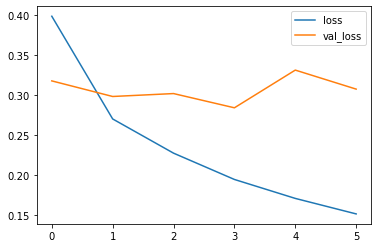

In [9]:
metrics = pd.DataFrame(model.history.history)
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

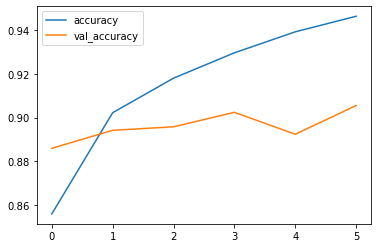

In [10]:
metrics[['accuracy', 'val_accuracy']].plot()

In [11]:
model.evaluate(x_test, y_cat_test, verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 0.3073 - accuracy: 0.9055


[0.30734291672706604, 0.9054999947547913]

In [12]:
predictions=np.argmax(model.predict(x_test),axis=1)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.85      0.87      0.86      1000
           3       0.88      0.93      0.90      1000
           4       0.89      0.80      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.73      0.78      0.76      1000
           7       0.97      0.94      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.94      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



<AxesSubplot:>

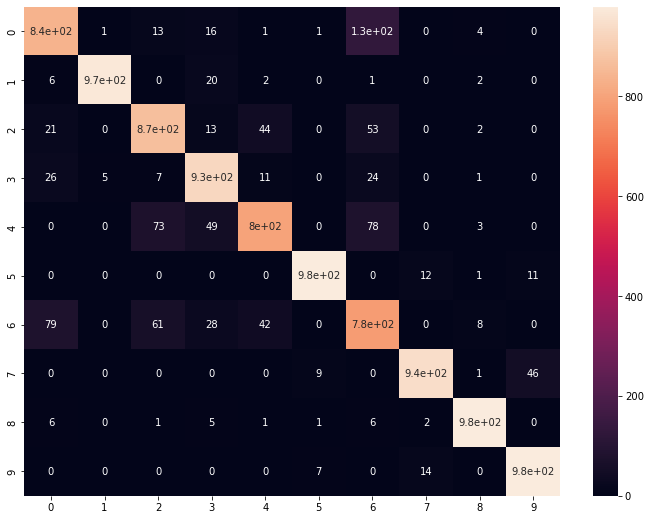

In [13]:
plt.figure(figsize=(12, 9))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

## Prediction System

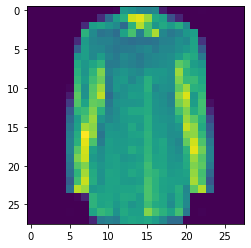

In [14]:
rnd=random.randint(0, 10000)
plt.imshow(x_test[rnd].reshape(28, 28))

In [15]:
print("The apparel in the given image is a  " + label_dict[np.argmax(model.predict(x_test[rnd].reshape(1, 28, 28, 1), verbose=0),axis=1)[0]])

The apparel in the given image is a  Coat
